In [18]:
import numpy as np
import pandas as pd
import torch
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
one_image = np.zeros(shape=(75,75))

v = [1,3]

seq_length = 20

In [21]:
data = np.array([])
for c in range(len(v)):
    for s_idx in range(one_image.shape[0]):
        temp_seq = np.array([])
        i = s_idx
        for seq_num in range(seq_length):
            temp = np.copy(one_image)
            temp[:,i] = np.ones(temp.shape[0])
            #print("temp shape: {}".format(temp.shape))
            temp_seq = np.append(temp_seq,temp)
            i = (i+v[c])%one_image.shape[0]
            #print(temp_seq.shape)
        #temp_seq = temp_seq[1:]
        temp_seq = np.reshape(temp_seq,(1,-1,75,75))
        data = temp_seq if not data.size else np.vstack((data,temp_seq))

In [22]:
data = np.reshape(data, (20,-1,75,75))

In [23]:
data.shape

(20, 150, 75, 75)

In [24]:
np.save(open('../../data/moving_bars_small_dim_75.npy','wb'),data)

In [30]:
images = torch.from_numpy(data[128])

In [32]:
image_dim = 64

In [33]:
images = make_grid(images.reshape(-1, 1, image_dim, image_dim), nrow=4, padding=5, pad_value=1)

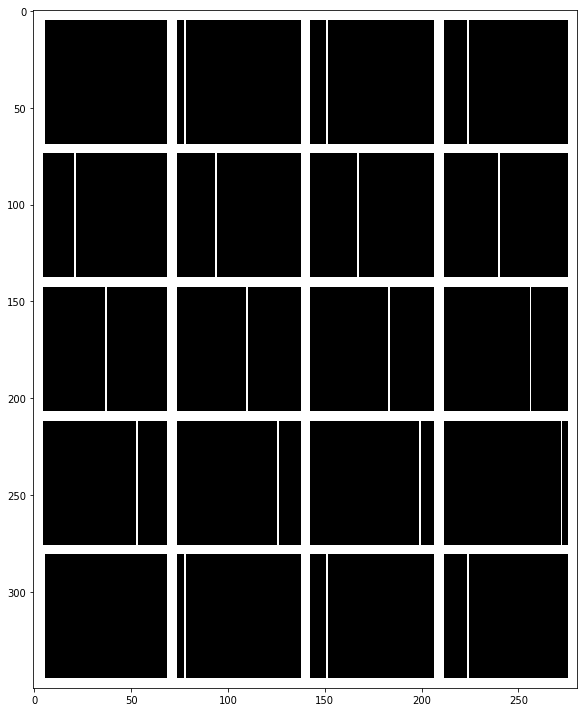

In [34]:
np_image = images.numpy()
fig = plt.figure(figsize=(30, 10))
plt.imshow(np.transpose(np_image, axes=(1, 2, 0)))
plt.tight_layout()